In [42]:
import numpy as np
import xarray as xr
import torch
import pickle
import pandas as pd
import os
import dask
import torch
import cftime
from datetime import datetime
from scipy.stats import norm
from torch import nn
from s2aenso.model import losses
from importlib import reload
from matplotlib.animation import FuncAnimation
from matplotlib import pyplot as plt
from scipy.special import erf
import warnings
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy.fft import fft, fftshift, ifftshift, ifft

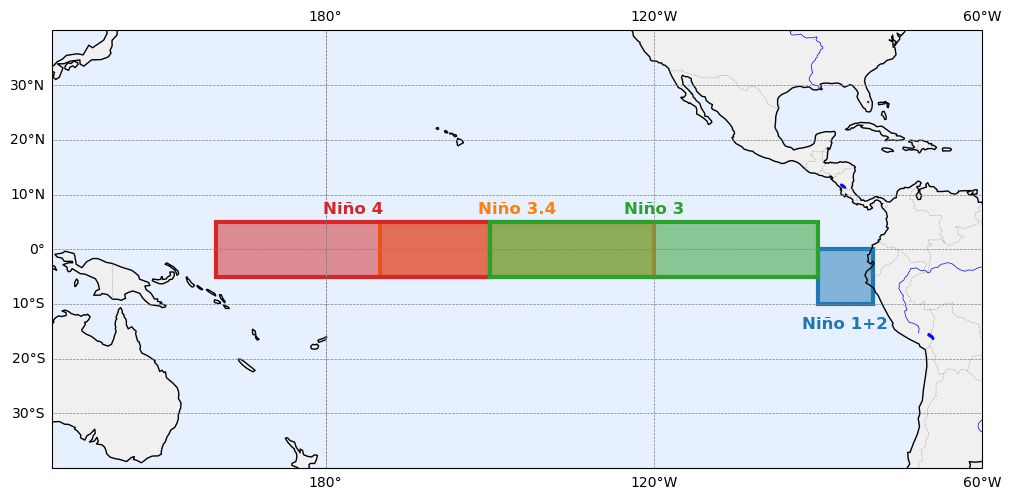

In [43]:
# Define regions with more sophisticated color scheme
regions = {
    '1+2': {'lat_range': (-10, 0), 'lon_range': (270, 280), 'color': '#1f77b4'},  # Blue
    '3.4': {'lat_range': (5, -5), 'lon_range': (190, 240), 'color': '#ff7f0e'},  # Orange
    '4': {'lat_range': (5, -5), 'lon_range': (160, 210), 'color': '#d62728'},  # Red
    '3': {'lat_range': (5, -5), 'lon_range': (210, 270), 'color': '#2ca02c'}  # Green
}

# Create a map projection
projection = ccrs.PlateCarree(central_longitude=180)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': projection})

# Plot each region with more sophisticated colors and transparency
for region_name, region_info in regions.items():
    # Draw the rectangular region
    ax.add_patch(plt.Rectangle(
        xy=(region_info['lon_range'][0], region_info['lat_range'][0]),
        width=region_info['lon_range'][1] - region_info['lon_range'][0],
        height=region_info['lat_range'][1] - region_info['lat_range'][0],
        facecolor=region_info['color'], edgecolor=region_info['color'], linewidth=2, alpha=0.5,
        transform=ccrs.PlateCarree()
    ))
    # Draw the outer border to highlight the region
    ax.add_patch(plt.Rectangle(
        xy=(region_info['lon_range'][0], region_info['lat_range'][0]),
        width=region_info['lon_range'][1] - region_info['lon_range'][0],
        height=region_info['lat_range'][1] - region_info['lat_range'][0],
        facecolor="none", edgecolor=region_info['color'], linewidth=3,
        transform=ccrs.PlateCarree()
    ))


    # Place the text label above the box
    text_placement = region_info['lat_range'][1] + 11 if region_name != '1+2' else region_info['lat_range'][1] - 15
    ax.text(
        x=(region_info['lon_range'][0] + region_info['lon_range'][1]) / 2,
        y=text_placement,  # Placed slightly below the bottom of the box
        s=f'Niño {region_name}', fontsize=12, weight='bold', color=region_info['color'],
        ha='center', va='bottom', transform=ccrs.PlateCarree()
    )

# Set the map extent to focus on the Pacific Ocean and add coastlines
ax.set_extent([130, 300, -40, 40], crs=ccrs.PlateCarree())  # Adjusted extent for Pacific Ocean
ax.coastlines(resolution='110m', color='black', linewidth=1)
ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), color='gray', linewidth=0.5, linestyle='--')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Add additional map features with subdued colors
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='gray')
ax.add_feature(cfeature.LAND, facecolor='#f0f0f0')  # Light gray land
ax.add_feature(cfeature.OCEAN, facecolor='#e6f0ff')  # Light blue ocean
ax.add_feature(cfeature.RIVERS, edgecolor='blue', linewidth=0.5)
ax.add_feature(cfeature.LAKES, facecolor='blue', edgecolor='blue', linewidth=0.5)

# Display the plot
plt.show()